In [146]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import norm
from sklearn.model_selection import train_test_split #used to split a dataset into training and testing sets.
from sklearn.preprocessing import StandardScaler #used to standardize features by removing the mean and scaling to unit variance.
from sklearn.ensemble import RandomForestClassifier #code trains a Random Forest classifier on the Iris dataset and evaluates its accuracy on unseen test data.
from sklearn.metrics import classification_report #provides a detailed performance evaluation of a classification model. 

# **Introduction to AI in the Workforce: A Job Market Analysis**
This analysis delves into the "AI-Powered Job Market Insights" dataset, offering a comprehensive exploration of how artificial intelligence (AI) and automation are influencing the modern job market. The dataset provides a snapshot of job listings across various industries, highlighting the following  factors  AI adoption levels, automation risk and salary ranges. By examining these elements, we aim to uncover key trends and insights into how AI is reshaping employment opportunities and job market dynamics.

**Objective**
The primary objective of this analysis is to identify and understand key patterns related to salaries, required skills, remote work, and job market trends influenced by AI. By employing various analytical techniques, we seek to reveal how AI adoption impacts compensation, skill requirements and job growth, as well as how it correlates with the likelihood of remote work.

**Data Overview**
The dataset includes the following key features:

- Job_Title: The title of the job role.
- Industry: The industry in which the job is located.
- Company_Size: The size of the company offering the job.
- Location: The geographic location of the job.
- AI_Adoption_Level: The extent to which the company has adopted AI in its operations.
- Automation_Risk: The estimated risk of the job being automated within the next 10 years.
- Required_Skills: The key skills required for the job role.
- Salary_USD: The annual salary offered for the job in USD.
- Remote_Friendly: Indicates whether the job can be performed remotely.
- Job_Growth_Projection: The projected growth or decline of the job role over the next five years.

In [147]:
job_Market= pd.read_csv(r"C:\Users\garet\OneDrive\Desktop\Semester 4 2024\Data Analytics\Datasets\Gareth-ai_job_market_insights.csv")

In [151]:
##The following segments were done by all group members.

# 1. Initial Data Inspection 

In [58]:
job_Market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    int64  
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


In [59]:
job_Market.describe()

,Salary_USD,Remote_Friendly
count,500.000000,500.000000
mean,91222.390974,0.502000
std,20504.291453,0.500497
min,31969.526346,0.000000
25%,78511.514863,0.000000
50%,91998.195286,1.000000
75%,103971.282092,1.000000
max,155209.821614,1.000000


In [60]:
job_Market.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,1,Growth
1,Marketing Specialist,Tech0logy,Large,Singapore,Medium,High,Marketing,93792.562466,0,Decline
2,AI Researcher,Tech0logy,Large,Singapore,Medium,High,UX/UI Design,107170.263069,1,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,0,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,1,Decline


# 2. Checking for Missing Values

In [61]:
print("\nMissing Values:")
missing_values = job_Market.isnull().sum()
print(missing_values)


Missing Values:
Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64


# 3. Checking for Duplicates

In [62]:
print("\nChecking for Duplicates:")
duplicates = job_Market.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
job_Market.drop_duplicates(inplace=True)


Checking for Duplicates:
Number of duplicate rows: 0


In [63]:
job_Market['Job_Title'].duplicated(keep=False)

0      True
1      True
2      True
3      True
4      True
       ... 
495    True
496    True
497    True
498    True
499    True
Name: Job_Title, Length: 500, dtype: bool

In [64]:
job_Market.isnull().sum()  #TO CHECK FOR DUPLICATED COLUMNS

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

In [65]:
job_Market[job_Market.duplicated()] #TO CHECK FOR ANY OUTLIERS

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection


In [66]:
#lets get the unique job titles in a dataframe
job_titles = job_Market['Job_Title'].unique()
job_titles_df = pd.DataFrame(job_titles, columns=['Job_Title'])
job_titles_df

,Job_Title
0,Cybersecurity Analyst
1,Marketing Specialist
2,AI Researcher
3,Sales Manager
4,UX Designer
5,HR Manager
6,Product Manager
7,Software Engineer
8,Data Scientist
9,Operations Manager


In [67]:
industries = job_Market['Industry'].unique()
industries_df = pd.DataFrame(industries, columns=['Industry'])

industries_df

,Industry
0,Entertainment
1,Tech0logy
2,Retail
3,Education
4,Finance
5,Transportation
6,Telecommunications
7,Manufacturing
8,Healthcare
9,Energy


In [68]:
location = job_Market['Location'].unique() 
           
hotspots = pd.DataFrame(location, columns=['Location'] )
hotspots

,Location
0,Dubai
1,Singapore
2,Berlin
3,Tokyo
4,San Francisco
5,London
6,Paris
7,Sydney
8,New York
9,Toronto


# 4.Analysis and Visualization

# Job Title

In [ ]:
#The Job Title segment was done by GARETH NEIL MUNYARADZI CHIWARA

In [69]:
job_Market.Job_Title.value_counts()

Job_Title
Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Sales Manager            49
Marketing Specialist     48
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: count, dtype: int64

The above data is the analysis of the total count data of job titles in the dataset

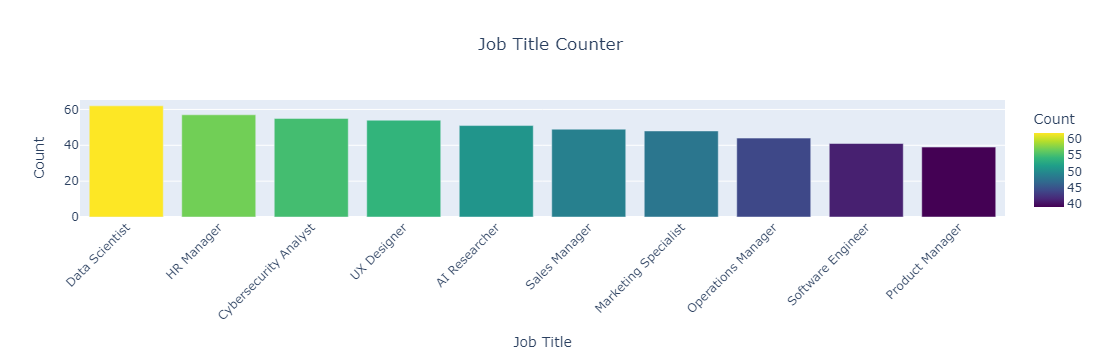

In [70]:
value_counts = job_Market['Job_Title'].value_counts().reset_index()
value_counts.columns = ['Job_Title', 'Count']
fig = px.bar(
    value_counts,
    x='Job_Title',
    y='Count',
    title='Job Title Counter',
    labels={'Count': 'Count', 'Job_Title': 'Job Title'},
    color='Count', 
    color_continuous_scale='Viridis'  
)
fig.update_layout(
    xaxis_title='Job Title',
    yaxis_title='Count',
    title_x=0.5,  
    xaxis=dict(
        tickangle=-45  
    )
)


fig.show()

The above displays a visualisation of the total Job Title count  it allows us to quickly identify the most common job titles and compare their frequencies, which can be valuable for understanding the composition of the dataset.

# Company Sizes

In [ ]:
#The Company Size segment was done by  SEBASTIANUS AILES

In [71]:
value_counts = job_Market['Company_Size'].value_counts().reset_index()
value_counts

,Company_Size,count
0,Small,171
1,Large,166
2,Medium,163


The above data is the analysis of the total count data of company sizes in the dataset

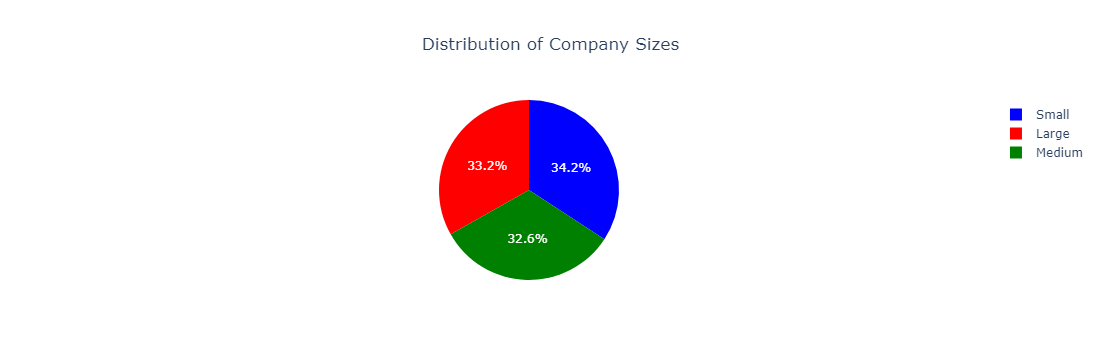

In [72]:
value_counts.columns = ['Company_Size', 'Count']

fig = px.pie(
    value_counts,
    names='Company_Size',
    values='Count',
    title='Distribution of Company Sizes',
    color='Company_Size',  # Optional: color segments by company size
    color_discrete_map={'Small': 'blue', 'Medium': 'green', 'Large': 'red'}  # Customize colors
)

fig.update_layout(
    title_x=0.5 
)

fig.show()

The above Visualisation is an Interactive Pie Chart it allows identify the percentage distribution between Small,Large and Medium companies within the  dataset this gives a clear understanding of how companie sizes are distrubuted in the dataset.

# Location

In [161]:
#This segment was done by LEANDRO ISAIAS CHAVES and SHALOM SASHA JERUTO BIRECH

In [73]:
job_Market.Location.value_counts()

Location
San Francisco    62
Singapore        54
Sydney           52
Dubai            51
Tokyo            51
New York         49
Berlin           48
London           46
Paris            46
Toronto          41
Name: count, dtype: int64

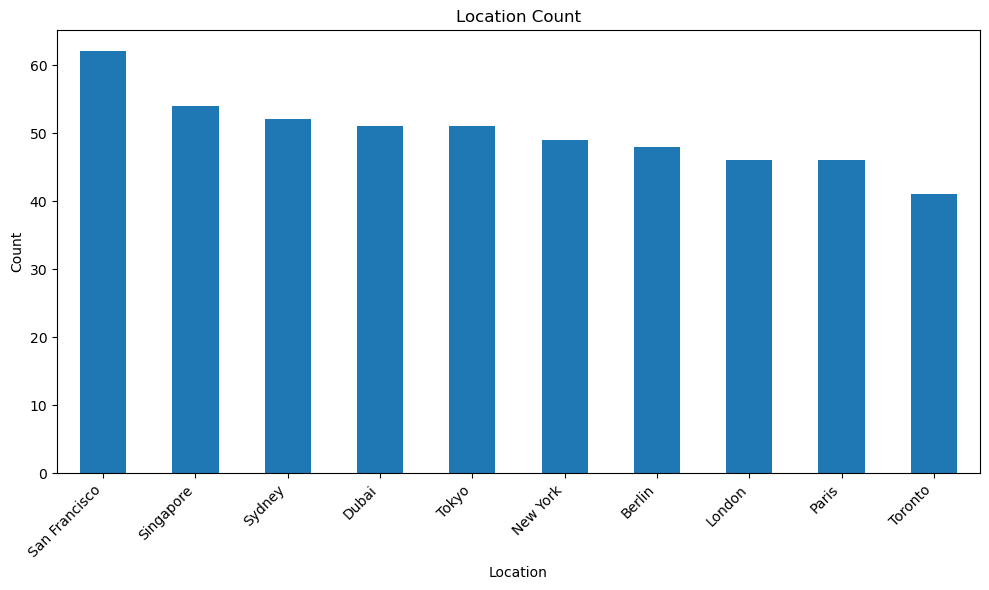

In [74]:
value_counts = job_Market['Location'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Location Count')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The above Visualisation is a Bar Chart it allows us to  identify the Locations aligning them with  Job titles found within the dataset.This allows us to view how many individuals are employed in the various Locations.

# Salary 

In [ ]:
#The Salary Segment was done by GARETH NEIL MUNYARADZI CHIWARA,EDNA DA SILVA ALEXANDRE and HERBERT DATI-TANGI AMAKUTSI

In [75]:
#mean
mean_salary = job_Market['Salary_USD'].mean()
print('The Mean Salary in USD is:',mean_salary)

#median
median_salary = job_Market['Salary_USD'].median()
print("The Median Salary in USD is:", median_salary)

#standard deviation
std_salary = job_Market['Salary_USD'].std()
print("The Standard Deviation of Salary in USD is:", std_salary)

The Mean Salary in USD is: 91222.39097406472
The Median Salary in USD is: 91998.19528620754
The Standard Deviation of Salary in USD is: 20504.291453460664


In [76]:
# Step 1: Calculating the  Q1, Q3, and IQR
Q1 = job_Market['Salary_USD'].quantile(0.25)
Q3 = job_Market['Salary_USD'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Showing the  upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median_salary = job_Market['Salary_USD'].median()
job_Market.loc[(job_Market['Salary_USD'] < lower_bound) | (job_Market['Salary_USD'] > upper_bound), 'Salary_USD'] = median_salary

The above code allows the replacement of OUTLIERS with the Median

In [77]:
Salary = job_Market.sort_values(by=['Salary_USD'], ascending=[False])   #T0 SEE WHICH JOBS HAVE THE HIGHEST SALARY
print(Salary)

                 Job_Title        Industry Company_Size       Location  \
361            UX Designer          Energy        Small         Sydney   
341     Operations Manager   Entertainment       Medium         Berlin   
232      Software Engineer         Finance        Large      Singapore   
132             HR Manager   Entertainment        Small  San Francisco   
143  Cybersecurity Analyst      Healthcare        Large  San Francisco   
..                     ...             ...          ...            ...   
138        Product Manager  Transportation        Small          Dubai   
469     Operations Manager   Manufacturing       Medium  San Francisco   
22             UX Designer          Retail        Small          Tokyo   
431            UX Designer         Finance       Medium  San Francisco   
282        Product Manager      Healthcare        Large  San Francisco   

    AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD  \
361               Low            Hi

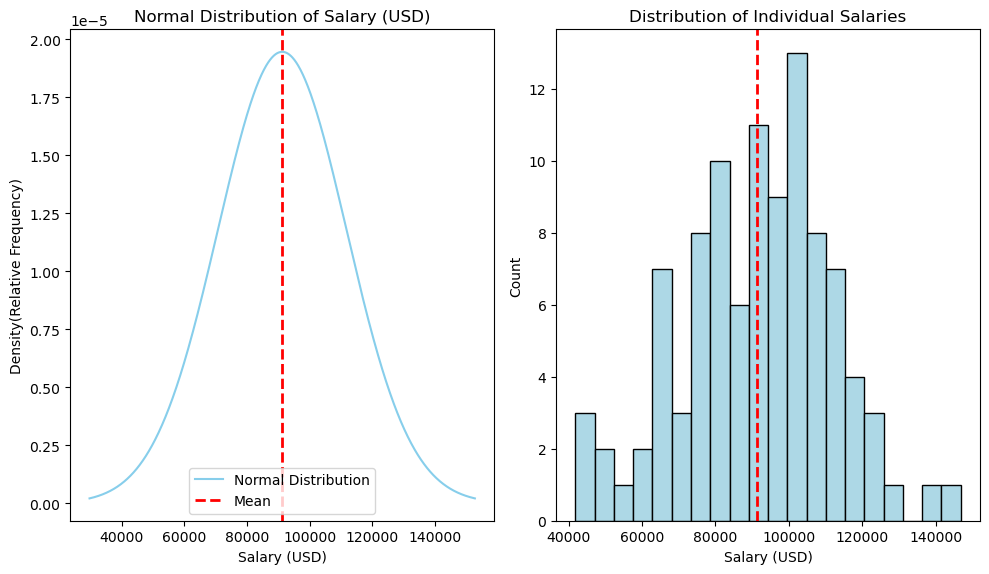

In [78]:
# Generating the data points for the normal distribution
x = np.linspace(mean_salary - 3 * std_salary, mean_salary + 3 * std_salary, 1000)
y = norm.pdf(x, mean_salary, std_salary)

#a sample of individual salary values 
individual_salaries = np.random.normal(mean_salary, std_salary, 100)

# Ploting the normal distribution
plt.figure(figsize=(10, 6))

# Subplot 1: Normal distribution
plt.subplot(1, 2, 1)
plt.plot(x, y, label='Normal Distribution', color='skyblue')
plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Normal Distribution of Salary (USD)')
plt.xlabel('Salary (USD)')
plt.ylabel('Density(Relative Frequency)')
plt.legend()

# Subplot 2: Bar chart of individual salaries
plt.subplot(1, 2, 2)
plt.hist(individual_salaries, bins=20, color='lightblue', edgecolor='black')
plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Distribution of Individual Salaries')
plt.xlabel('Salary (USD)')
plt.ylabel('Count')

# Displaying the plot
plt.tight_layout()
plt.show()


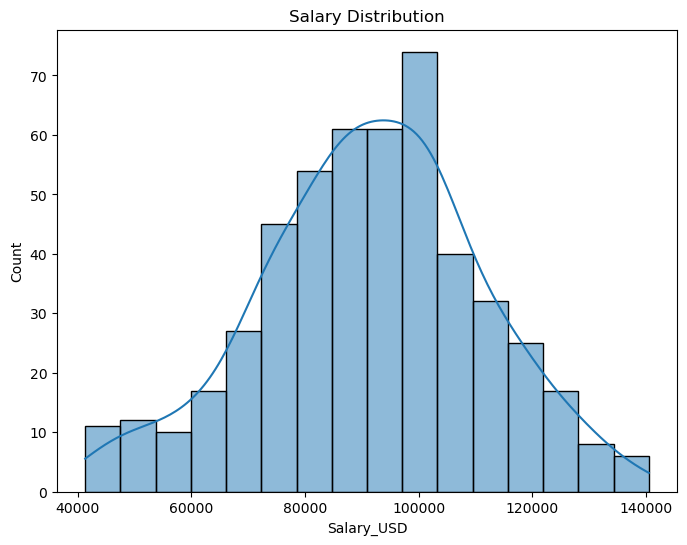

In [79]:
plt.figure(figsize=(8, 6))
sns.histplot(job_Market['Salary_USD'], kde=True)
plt.title('Salary Distribution')
plt.show()

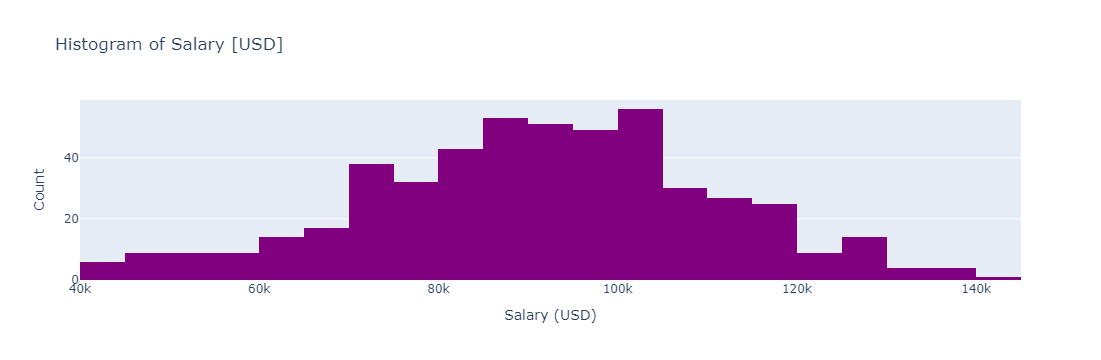

In [80]:
fig = px.histogram(job_Market, x='Salary_USD', nbins=20, title='Histogram of Salary [USD]', color_discrete_sequence=['purple'])
fig.update_xaxes(title_text='Salary (USD)')
fig.update_yaxes(title_text='Count')

# Adding tick labels to the x-axis
fig.update_xaxes(tickvals=[40000, 60000, 80000, 100000, 120000, 140000],ticktext=['40k', '60k', '80k', '100k', '120k', '140k'])

fig.show()

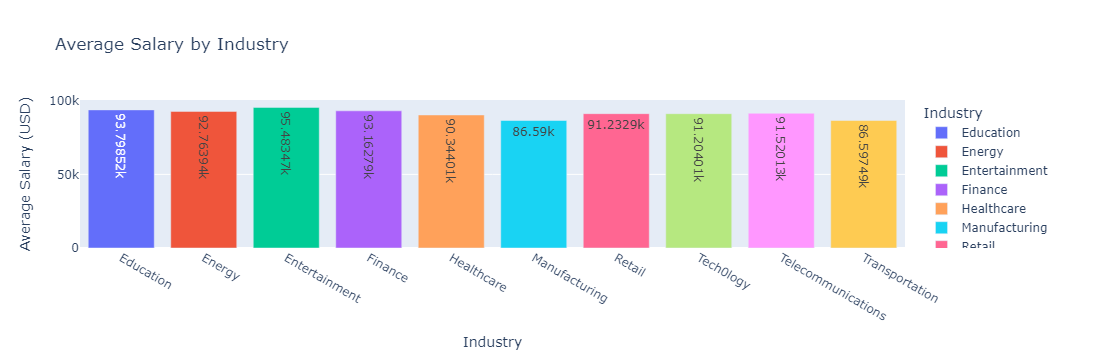

In [81]:
fig = px.bar(job_Market.groupby('Industry')['Salary_USD'].mean().reset_index(), 
              x = 'Industry', 
              y = 'Salary_USD', 
              title="Average Salary by Industry", 
              labels={'Salary_USD': 'Average Salary (USD)'},
              text_auto = True,
                color = 'Industry')
fig.show()

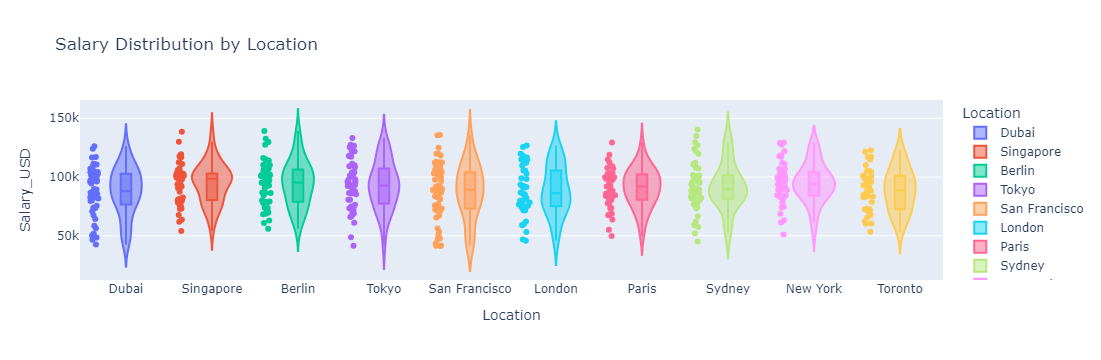

In [82]:
fig = px.violin(job_Market, 
             x = 'Location', 
             y = 'Salary_USD', 
             title = "Salary Distribution by Location",
               color = 'Location',
               box = True,
               points = 'all',
               height = 800 
)
fig.show()

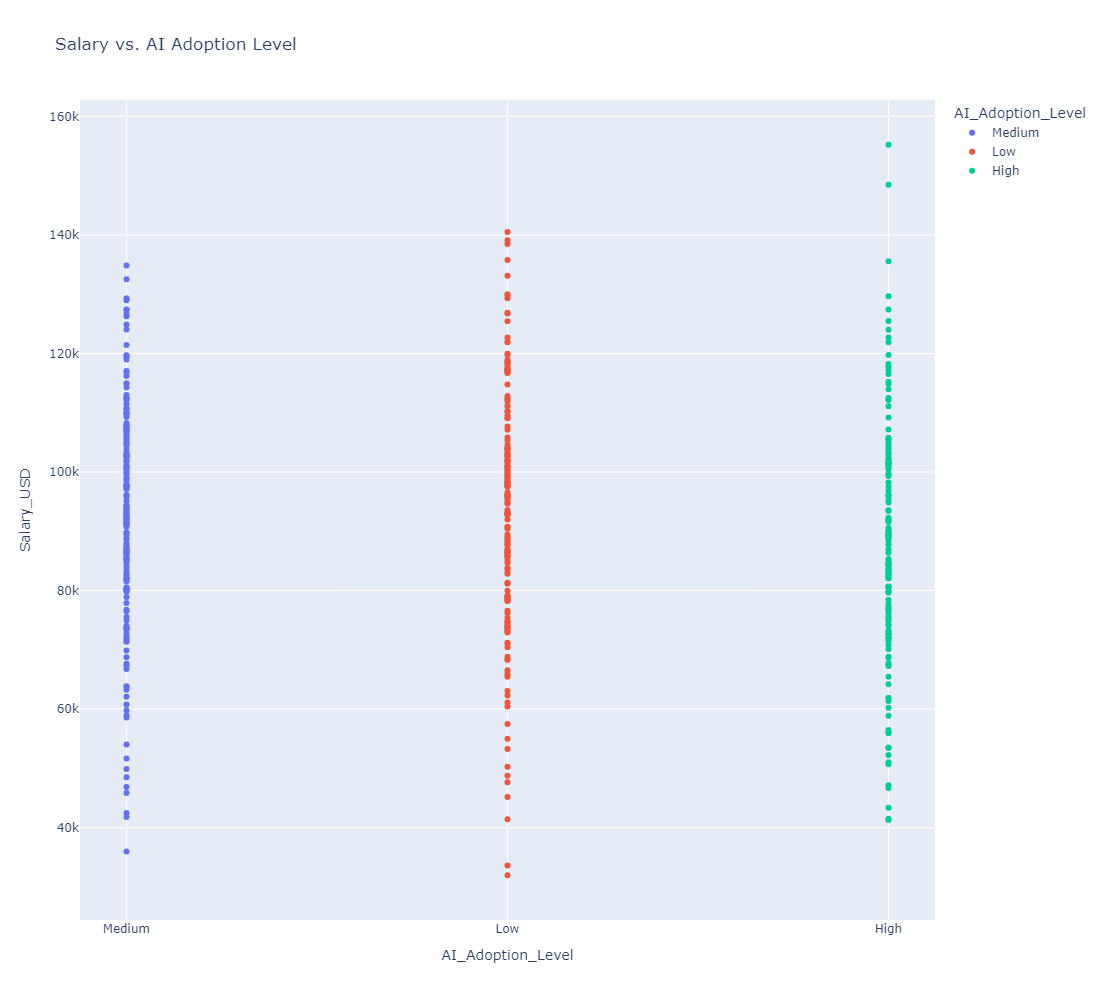

In [149]:
fig = px.scatter(job_Market, x ='AI_Adoption_Level', 
                 y = 'Salary_USD', 
                 color = 'AI_Adoption_Level', 
                 title = "Salary vs. AI Adoption Level",
                height = 1000
                )
fig.show()

The above visualisation allows the projection of AI Adpotion against with the salary this gives a summary of the different salaries paid according to the AI Adption leve

# AI Adoption


In [152]:
 #The AI Adoption segment was done by SHALOM SASHA JERUTO BIRECH and LEANDRO ISAIAS CHAVES

In [83]:
value_counts=job_Market["AI_Adoption_Level"].value_counts()
value_counts

AI_Adoption_Level
Medium    179
Low       174
High      147
Name: count, dtype: int64

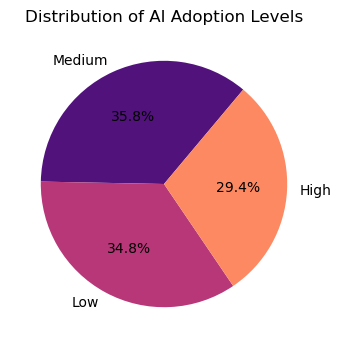

In [84]:
colors = sns.color_palette('magma', len(value_counts))
plt.figure(figsize=(4, 4))
plt.pie(
    value_counts,
    labels=value_counts.index,
    autopct='%1.1f%%',  
    colors=colors,  
    startangle=50  
)
plt.title('Distribution of AI Adoption Levels')
plt.show()

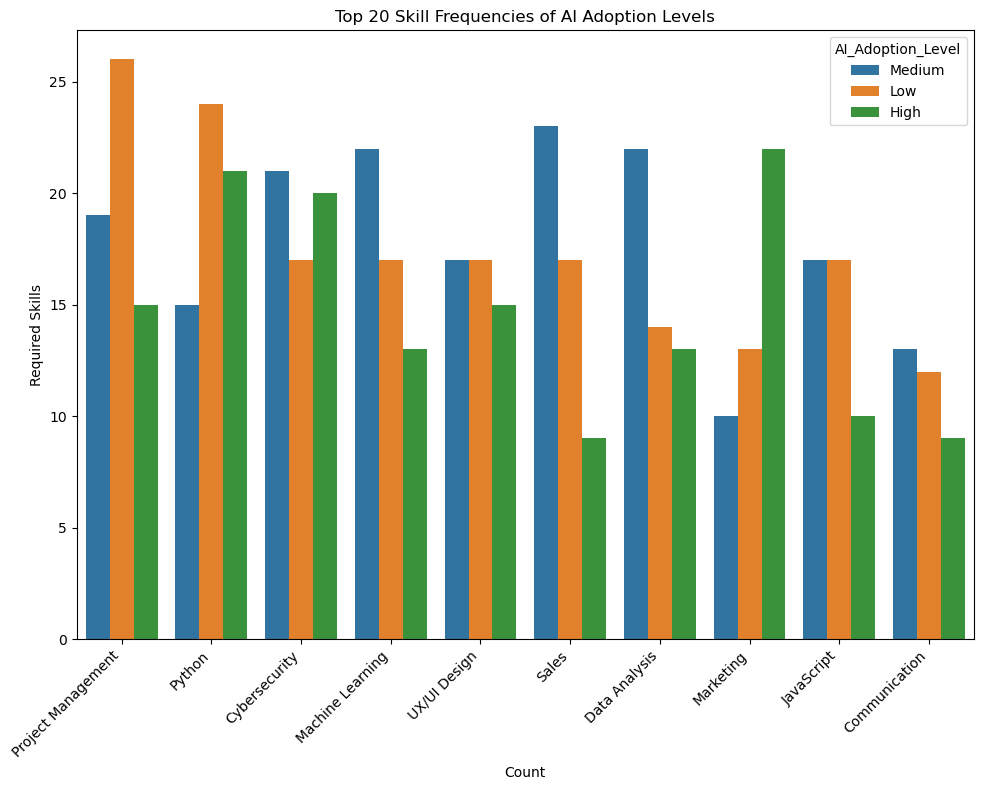

In [85]:
top_n = 20 
top_skills = job_Market['Required_Skills'].value_counts().nlargest(top_n).index
df_top = job_Market[job_Market['Required_Skills'].isin(top_skills)]

plt.figure(figsize=(10, 8))
sns.countplot(x='Required_Skills', hue='AI_Adoption_Level', data=df_top, order=top_skills)
plt.title(f"Top {top_n} Skill Frequencies of AI Adoption Levels")
plt.xlabel("Count")
plt.ylabel("Required Skills")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The above visualisation displays the following : 


**Most In-Demand Skills**: Python, Data Analysis, and Machine Learning are the most frequently required skills across the dataset, indicating their central role in jobs involving AI.

**AI Adoption and Skill Frequency**: High AI adoption companies (green) require these technical skills more frequently, especially skills like Machine Learning, Python, and Data Analysis. This makes sense as these skills are crucial for developing and implementing AI systems.

**Non-Technical Skills**: Interestingly, non-technical skills like Communication and Project Management are also in demand, especially in Medium and Low AI adoption levels, suggesting that these skills are still crucial even in AI-driven industries.

**UX/UI Design**: This skill is highly demanded across all levels of AI adoption, highlighting its importance even in highly automated environments.


AI Adoption Level vs Remote Work Opportunity:
AI_Adoption_Level  High  Low  Medium
Remote_Friendly                     
0                    77   80      92
1                    70   94      87


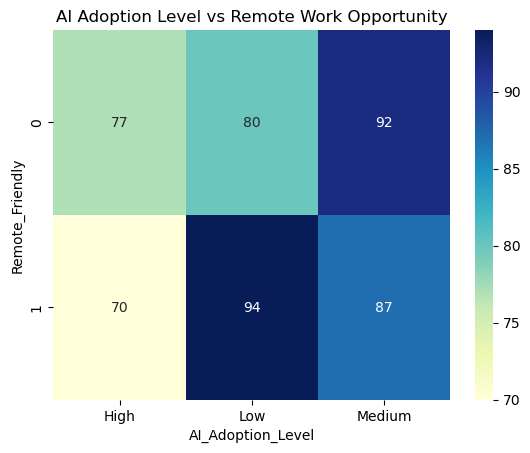

In [150]:
#AI Adoption Level Impact on Remote Work
remote_ai_adoption_crosstab = pd.crosstab(job_Market['Remote_Friendly'], job_Market['AI_Adoption_Level'])
print("\nAI Adoption Level vs Remote Work Opportunity:")
print(remote_ai_adoption_crosstab)

# Visualization
sns.heatmap(remote_ai_adoption_crosstab, annot=True, cmap="YlGnBu")
plt.title("AI Adoption Level vs Remote Work Opportunity")
plt.show()

AI Adoption Level and Remote Work: The relationship between AI adoption level and remote work opportunity is inversely correlated. High AI adoption levels show a lower likelihood of jobs being remote-friendly (70), while low AI adoption levels correspond with a higher likelihood of remote-friendly jobs (94). This indicates that jobs with lower AI integration are more conducive to remote work.

Remote-Friendly Jobs:Remote-friendly jobs tend to cluster in environments with low AI adoption, with a strong presence (94). Conversely, high AI adoption jobs show less likelihood of being remote-friendly (70), suggesting that AI-driven environments may require more on-site presence.

# Remote Friendly 

In [155]:
# This segment was done by AZUWA KWENACHUKWU

In [88]:
job_Market["Remote_Friendly"].value_counts()

Remote_Friendly
1    251
0    249
Name: count, dtype: int64

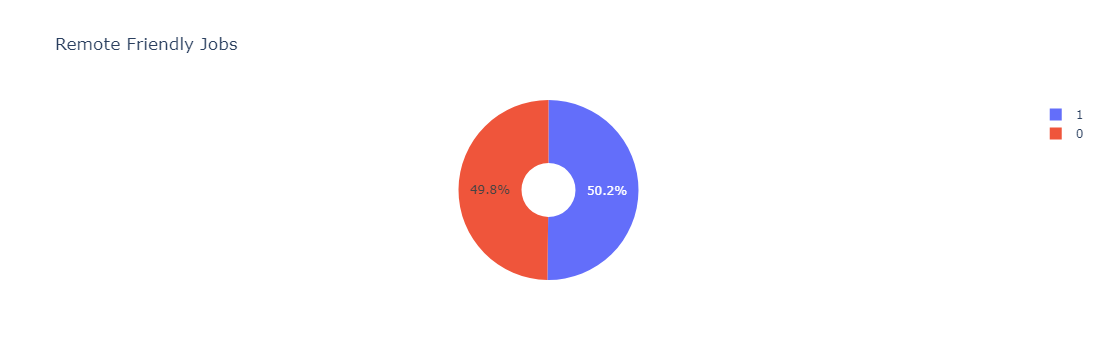

In [89]:
fig = px.pie(job_Market, 
             names = 'Remote_Friendly', 
             title = "Remote Friendly Jobs",
            hole = 0.3)
fig.show()

# Required Skill

In [156]:
# This segment was done by ROBIN PANDULENI

In [90]:
value_counts = job_Market['Required_Skills'].value_counts().reset_index()
value_counts

,Required_Skills,count
0,Project Management,60
1,Python,60
2,Cybersecurity,58
3,Machine Learning,52
4,UX/UI Design,49
5,Sales,49
6,Data Analysis,49
7,Marketing,45
8,JavaScript,44
9,Communication,34


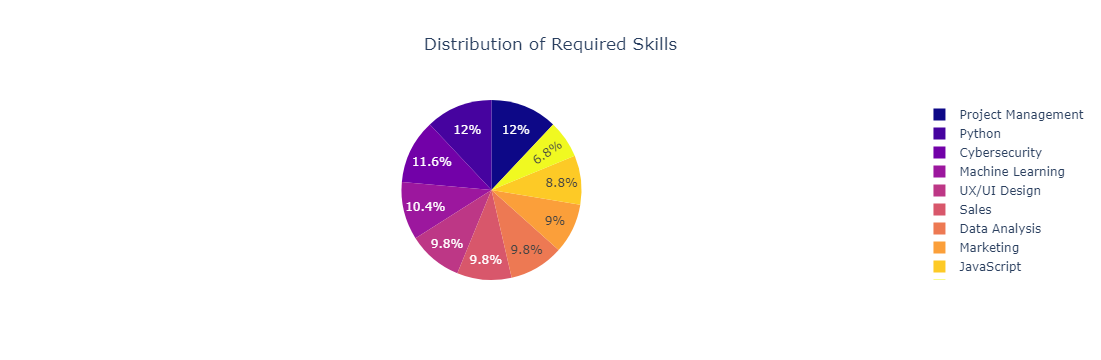

In [91]:
value_counts.columns = ['Required_Skills', 'Count']
fig = px.pie(
    value_counts,
    names='Required_Skills',
    values='Count',
    title='Distribution of Required Skills',
    color_discrete_sequence=px.colors.sequential.Plasma 
)
fig.update_layout(
    title_x=0.5 
)
fig.show()

# Industry

In [157]:
#This segment was done by TATENDA BVOCHO

In [92]:
value_counts=job_Market.Industry.value_counts()
value_counts

Industry
Manufacturing         58
Education             57
Tech0logy             56
Finance               53
Telecommunications    53
Energy                49
Entertainment         47
Retail                46
Healthcare            42
Transportation        39
Name: count, dtype: int64

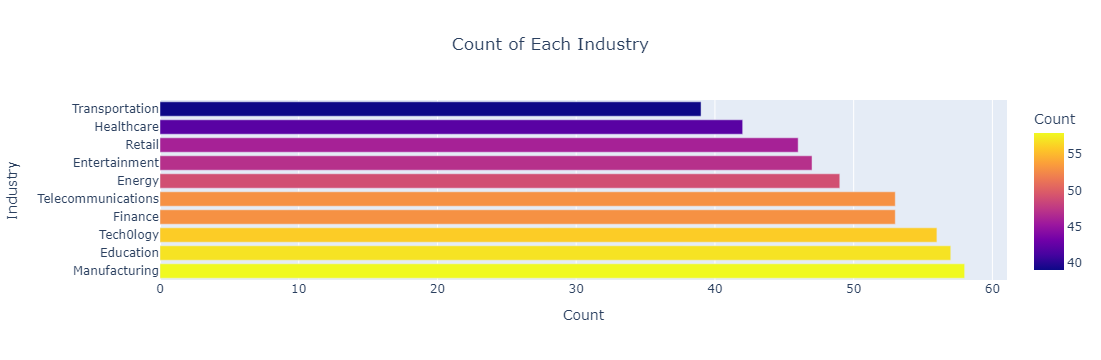

In [93]:
value_counts = value_counts.reset_index()
value_counts.columns = ['Industry', 'Count']

fig = px.bar(
    value_counts,
    y='Industry',
    x='Count',
    title='Count of Each Industry',
    labels={'Count': 'Count', 'Industry': 'Industry'},
    color='Count', 
    color_continuous_scale='Plasma'  
)

fig.update_layout(
    xaxis_title='Count',
    yaxis_title='Industry',
    title_x=0.5,  # Center the title
    yaxis=dict(
        tickangle=0  
    )
)

fig.show()

# Automation Risk


In [158]:
#This segment was done by NICOLA YVONNE BASSON

In [94]:
value_counts=job_Market.Automation_Risk.value_counts()
value_counts

Automation_Risk
Medium    173
High      169
Low       158
Name: count, dtype: int64

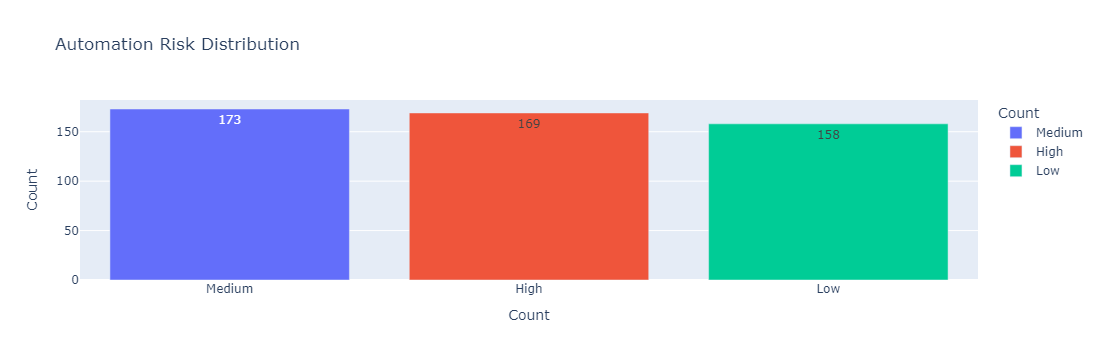

In [95]:
automation_risk = job_Market['Automation_Risk'].value_counts().reset_index()
automation_risk.columns = ['Automation_Risk','Count']
fig = px.bar(automation_risk, 
              x = 'Automation_Risk', 
              y = 'Count',
              title = "Automation Risk Distribution", 
              labels = {'Automation_Risk': 'Automation Risk', 'Automation_Risk': 'Count'},
            text_auto = True,
            color = 'Automation_Risk',
             height = 500
            )
fig.show()

# Job Growth Projection

In [160]:
#This segment was done by NICOLA YVONNE BASSON

In [96]:
value_counts=job_Market.Job_Growth_Projection.value_counts()
value_counts

Job_Growth_Projection
Growth     169
Decline    169
Stable     162
Name: count, dtype: int64

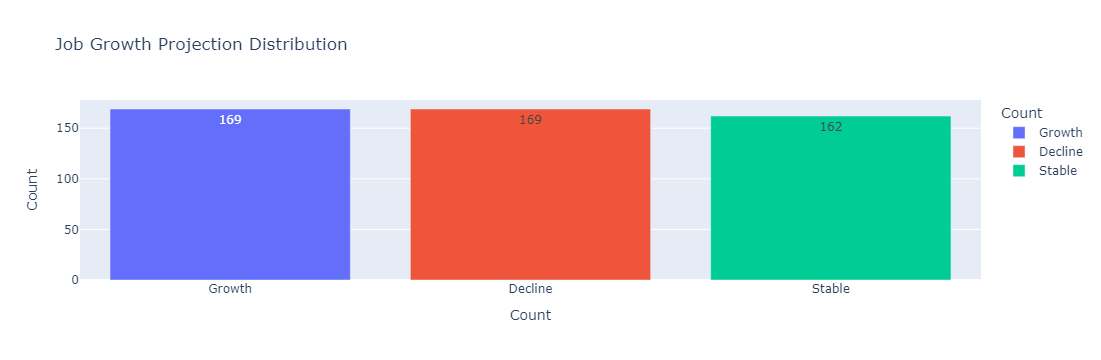

In [97]:
growth_projection = job_Market['Job_Growth_Projection'].value_counts().reset_index()
growth_projection.columns =['Job_Growth_Projection','Count']
fig = px.bar(growth_projection, 
              x = 'Job_Growth_Projection', y = 'Count', 
              title = "Job Growth Projection Distribution", 
              labels = {'Job_Growth_Projection': 'Job Growth Projection', 'Job_Growth_Projection': 'Count'},
            text_auto = True,
            color = 'Job_Growth_Projection',
             height = 500
            )
fig.show()

# Machine Learning

<h3>Data selection</h3>

In [121]:
job_Market.drop(columns=["Location","Industry","Required_Skills","Salary_USD","Job_Title"],axis=1, inplace=True)

In [122]:
job_Market.head()

,Company_Size,AI_Adoption_Level,Automation_Risk,Remote_Friendly,Job_Growth_Projection
0,Small,Medium,High,1,Growth
1,Large,Medium,High,0,Decline
2,Large,Medium,High,1,Growth
3,Small,Low,High,0,Growth
4,Small,Low,Low,1,Decline


<h2>Split data</h2>

In [123]:
# Converting the categorical columns using one-hot encoding
df_encoded = pd.get_dummies(job_Market, columns=[  'Company_Size', 'AI_Adoption_Level', 'Automation_Risk', 'Remote_Friendly', 'Job_Growth_Projection'], drop_first=True)

# verifying the encoded dataset
print(df_encoded.head())

# This code takes a DataFrame with categorical columns and transforms them into numerical format using one-hot encoding.

   Company_Size_Medium  Company_Size_Small  AI_Adoption_Level_Low  \
0                False                True                  False   
1                False               False                  False   
2                False               False                  False   
3                False                True                   True   
4                False                True                   True   

   AI_Adoption_Level_Medium  Automation_Risk_Low  Automation_Risk_Medium  \
0                      True                False                   False   
1                      True                False                   False   
2                      True                False                   False   
3                     False                False                   False   
4                     False                 True                   False   

   Remote_Friendly_1  Job_Growth_Projection_Growth  \
0               True                          True   
1              False

In [124]:
# Features (X) and Target (y)
X = df_encoded.drop('Job_Growth_Projection_Growth', axis=1)
y = df_encoded['Job_Growth_Projection_Growth']

# This code separates the dataset into features (X) and the target variable (y).
#Therefore  X contains all the columns except for 'Salary_USD', which is what we are  trying to predict and is stored in y.

In [125]:
from sklearn.model_selection import train_test_split

# Spliting the the data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# This code splits the dataset into training and testing sets, with 70% of the data allocated for training the model and 30% for testing the performance.

In [126]:
from sklearn.preprocessing import StandardScaler

# Initialization of the scaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transformation of the data.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# This code standardizes the features in the training and test datasets using StandardScaler. This process ensures that all features contribute equally to the  model, which can improve the performance of various machine learning algorithms. 

<h2>BUILD MODELS</h2>

In [127]:
# Import necessary libraries for the Models to be built
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression #imports the LinearRegression model, which is used for predicting continuous outcomes by fitting a straight line to the data.
from sklearn.tree import DecisionTreeRegressor #makes predictions by splitting the data into branches based on feature values. 
from sklearn.ensemble import GradientBoostingRegressor #an ensemble learning technique that combines multiple weak models (usually decision trees) to create a stronger model.
from sklearn.svm import SVR #(Support Vector Regression) model is used for predicting continuous outcomes.
from sklearn.metrics import mean_absolute_error, r2_score #These metrics are used to evaluate the performance of regression models
from sklearn.model_selection import cross_val_score #used to evaluate the model’s performance by splitting the dataset into multiple subsets 
from sklearn.ensemble import RandomForestRegressor

# This code imports regression models, evaluation metrics and  cross-validation tools from Scikit-learn. These components will allow us to  build, evaluate, and compare the performance of different regression algorithms on the dataset

#### Random Forest Regressor 

In [128]:
# Initializing the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train_scaled, y_train)

# Cross-validation score
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Random Forest CV MAE: {-rf_cv_scores.mean():.2f}")

# Prediction of the test set
rf_y_pred = rf_model.predict(X_test_scaled)

# Testing the  set evaluation
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest MAE: {rf_mae:.2f}, R-squared: {rf_r2:.2f}")

# This code trains a Random Forest regression model on the scaled training data and evaluates its performance using cross-validation (calculating the mean absoluteerror) and makes predictions on the test set.

Random Forest CV MAE: 0.35
Random Forest MAE: 0.36, R-squared: 0.06


#### Linear Regression

In [109]:
# Initializing the model
lr_model = LinearRegression()

# Training the model
lr_model.fit(X_train_scaled, y_train)

# Cross-validation score
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Linear Regression CV MAE: {-lr_cv_scores.mean():.2f}")

# Prediction on the test set
lr_y_pred = lr_model.predict(X_test_scaled)

# Testing set evaluation
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

print(f"Linear Regression MAE: {lr_mae:.2f}, R-squared: {lr_r2:.2f}")

# This code trains the linear regression model on the scaled training data,evaluates its performance using cross-validation and makes predictions on the 
# test set.It evaluates the model's performance on the test set using mean absolute error and R-squared, providing a comprehensive assessment of the model's accuracy and fit.

Linear Regression CV MAE: 0.35
Linear Regression MAE: 0.36, R-squared: 0.23


#### Decision Tree Regressor

In [137]:
from sklearn.pipeline import Pipeline

# Initializing the model
dt_model = DecisionTreeRegressor(random_state=42)

# Training the model
dt_model.fit(X_train_scaled, y_train)

# Cross-validation score
dt_cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Decision Tree CV MAE: {-dt_cv_scores.mean():.2f}")

# Prediction on the test set
dt_y_pred = dt_model.predict(X_test_scaled)

# Testing set evaluation
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

print(f"Decision Tree MAE: {dt_mae:.2f}, R-squared: {dt_r2:.2f}")

# This code trains a decision tree regression model on the scaled training data and evaluates its performance using cross-validation (calculating the mean absoluteerror), and makes predictions on the test set. 
# Therefore there is  creation of  a pipeline for the Decision Tree Classifier
pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Hyperparameter tuning using Grid Search
param_grid = {
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters from Grid Search
print("Best parameters found: ", grid_search.best_params_)

# Prediction on the test set
y_pred = grid_search.predict(X_test_scaled)

# Calculation of the  accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Displaying the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)

Decision Tree CV MAE: 0.35
Decision Tree MAE: 0.36, R-squared: 0.04
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}
Accuracy: 63.33%

Classification Report:
               precision    recall  f1-score   support

       False       0.70      0.75      0.73        97
        True       0.48      0.42      0.44        53

    accuracy                           0.63       150
   macro avg       0.59      0.58      0.59       150
weighted avg       0.62      0.63      0.63       150



#### Gradient Boosting Model

In [130]:
# Initializing the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Training the model
gb_model.fit(X_train_scaled, y_train)

# Cross-validation score
gb_cv_scores = cross_val_score(gb_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Gradient Boosting CV MAE: {-gb_cv_scores.mean():.2f}")

# Prediction on the test set
gb_y_pred = gb_model.predict(X_test_scaled)

# Testing set evaluation
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

print(f"Gradient Boosting MAE: {gb_mae:.2f}, R-squared: {gb_r2:.2f}")

#This code trains a Gradient Boosting regression model on the scaled training data and evaluates its performance using cross-validation (calculating the mean 
# absolute error) and makes predictions on the test set.


Gradient Boosting CV MAE: 0.36
Gradient Boosting MAE: 0.36, R-squared: 0.19


<h2>Summary of results</h2>

In [136]:
# Summary of results
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
mae_values = [lr_mae, dt_mae, rf_mae, gb_mae]
r2_values = [lr_r2, dt_r2, rf_r2, gb_r2]

# Printing the table
print("\nModel Performance Comparison:")
for i in range(len(models)):
    print(f"{models[i]} - MAE: {mae_values[i]:.2f}, R-squared: {r2_values[i]:.2f}")

# The code effectively summarizes the performance metrics of the evaluated regression models, allowing  easy comparison of their predictive capabilities. 


Model Performance Comparison:
Linear Regression - MAE: 0.36, R-squared: 0.23
Decision Tree - MAE: 0.36, R-squared: 0.04
Random Forest - MAE: 0.36, R-squared: 0.06
Gradient Boosting - MAE: 0.36, R-squared: 0.19


In [132]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Creation an instance of the Random Forest model 
# rf_model = RandomForestRegressor()  

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print(f"Best parameters for Random Forest: {grid_search.best_params_}")


# This code effectively sets up a grid search for tuning hyperparameters of the  Random Forest model. It defines a range of values to test for specific 
# hyperparameters and  runs cross-validation to evaluate each combination and outputs the best-performing set of parameters.

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


# Models visualisation

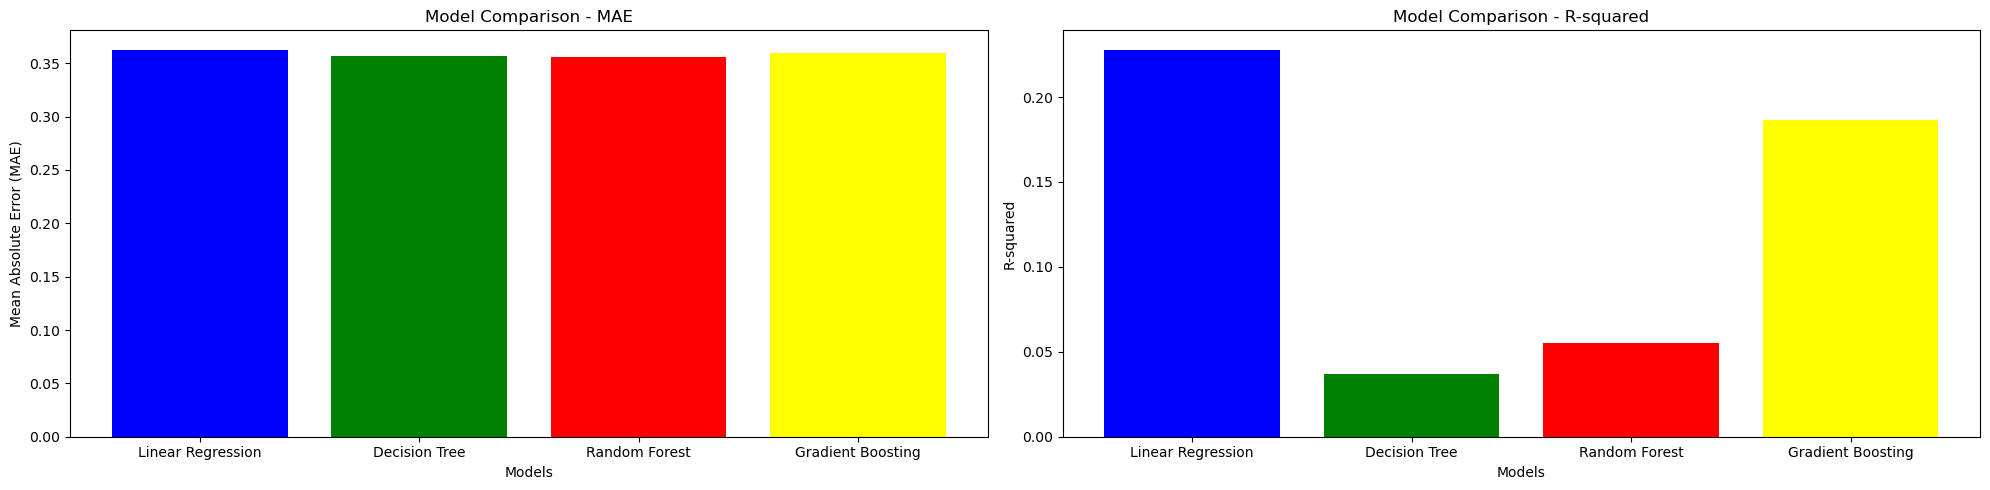

In [144]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
mae_values = [lr_mae, dt_mae, rf_mae, gb_mae]
r2_values = [lr_r2, dt_r2, rf_r2, gb_r2]
# Model performance metrics
# Plot MAE
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.bar(models, mae_values, color=['blue', 'green','red','yellow'])
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model Comparison - MAE')

# Plot R-squared
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['blue', 'green','red','yellow'])
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Model Comparison - R-squared')

plt.tight_layout()
plt.show()


Linear Regression performs the best in terms of R-squared, explaining 23% of the variance in the target variable.
Gradient Boosting is the second-best, explaining 19% of the variance.
Random Forest and Decision Tree have lower R-squared values, indicating they are not capturing the underlying patterns as well ad Gradient Boosting.